In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')


# set up formatting for x axis time values
monthfmt = DateFormatter("%b")
yearfmt = DateFormatter("%Y")

def combinedfmt(x,pos):
    string = monthfmt(x)
    if string == "Jan":
        string += "\n" + yearfmt(x)
    return string

def format_date_ax(ax):
    ax.xaxis.set_major_locator(MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(FuncFormatter(combinedfmt))
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center');
    return None

---

#### Original GOES ABI Brightness Temperature Summary Statistics

In [2]:
# open csv file with summary stats
df_original_tb = pd.read_csv('goes_modis_aster_original_tb_summary_stats.csv')
# set datetime to aster_datetime
df_original_tb['datetime'] = pd.to_datetime(df_original_tb.aster_datetime.copy())
# uset this as the index
df_original_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_original_tb['ast_mod_r2_value'] = df_original_tb.ast_mod_r_value.copy()**2
df_original_tb['ast_goes_r2_value'] = df_original_tb.ast_goes_r_value.copy()**2
df_original_tb['mod_goes_r2_value'] = df_original_tb.mod_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000

df_original_tb = df_original_tb.where(df_original_tb.ast_mod_n >= 45000)

# preview
df_original_tb.head(1)

,Unnamed: 0,bounding_geometry,aster_filepath,aster_datetime,modis_filepath,modis_datetime,goes_filepath,goes_datetime,ast_mod_n,ast_mod_mean_diff,...,mod_goes_rms_diff,mod_goes_std_diff,mod_goes_slope,mod_goes_intercept,mod_goes_r_value,mod_goes_p_value,mod_goes_std_err,ast_mod_r2_value,ast_goes_r2_value,mod_goes_r2_value
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-04 18:51:03+00:00,0.0,"[{'type': 'Polygon', 'coordinates': [[[285000,...",/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,2017-03-04 18:51:03+00:00,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,2017-03-04 18:50:00+00:00,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,2017-03-04 18:50:31+00:00,49284.0,1.15041,...,6.034558,5.424094,0.478468,-3.37623,0.609285,0.0,0.002805,0.484331,0.077054,0.371228


#### Original GOES ABI Radiance Summary Statistics

In [3]:
# open csv file with summary stats
df_original_rad = pd.read_csv('goes_modis_aster_original_rad_summary_stats.csv')
# set datetime to aster_datetime
df_original_rad['datetime'] = pd.to_datetime(df_original_rad.aster_datetime.copy())
# uset this as the index
df_original_rad.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_original_rad['ast_mod_r2_value'] = df_original_rad.ast_mod_r_value.copy()**2
df_original_rad['ast_goes_r2_value'] = df_original_rad.ast_goes_r_value.copy()**2
df_original_rad['mod_goes_r2_value'] = df_original_rad.mod_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000

df_original_rad = df_original_rad.where(df_original_rad.ast_mod_n >= 45000)

# preview
#df_original_rad.head(1)

#### Orthorectified GOES ABI Brightness Temperature Summary Statistics

In [4]:
# open csv file with summary stats
df_ortho_tb = pd.read_csv('goes_modis_aster_orthorectified_tb_summary_stats.csv')
# set datetime to aster_datetime
df_ortho_tb['datetime'] = pd.to_datetime(df_ortho_tb.aster_datetime.copy())
# uset this as the index
df_ortho_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_ortho_tb['ast_mod_r2_value'] = df_ortho_tb.ast_mod_r_value.copy()**2
df_ortho_tb['ast_goes_r2_value'] = df_ortho_tb.ast_goes_r_value.copy()**2
df_ortho_tb['mod_goes_r2_value'] = df_ortho_tb.mod_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000

df_ortho_tb = df_ortho_tb.where(df_ortho_tb.ast_mod_n >= 45000)

# preview
#df_ortho_tb.head(1)

#### Orthorectified GOES ABI Radiance Summary Statistics

In [5]:
# open csv file with summary stats
df_ortho_rad = pd.read_csv('goes_modis_aster_orthorectified_rad_summary_stats.csv')
# set datetime to aster_datetime
df_ortho_rad['datetime'] = pd.to_datetime(df_ortho_rad.aster_datetime.copy())
# uset this as the index
df_ortho_rad.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_ortho_rad['ast_mod_r2_value'] = df_ortho_rad.ast_mod_r_value.copy()**2
df_ortho_rad['ast_goes_r2_value'] = df_ortho_rad.ast_goes_r_value.copy()**2
df_ortho_rad['mod_goes_r2_value'] = df_ortho_rad.mod_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000

df_ortho_rad = df_ortho_rad.where(df_ortho_rad.ast_mod_n >= 45000)

# preview
#df_ortho_rad.head(1)

---

### Plot Brightness Temperature Summary Stats Together

In [6]:
# Make difference dataframe
df_change_tb = df_original_tb.drop(columns=['Unnamed: 0', 'bounding_geometry', 'aster_filepath', 
                                            'aster_datetime','modis_filepath', 'modis_datetime', 
                                            'goes_filepath', 'goes_datetime']) - \
               df_ortho_tb.drop(columns=['Unnamed: 0', 'bounding_geometry', 'aster_filepath', 
                                         'aster_datetime','modis_filepath', 'modis_datetime', 
                                         'goes_filepath', 'goes_datetime'])

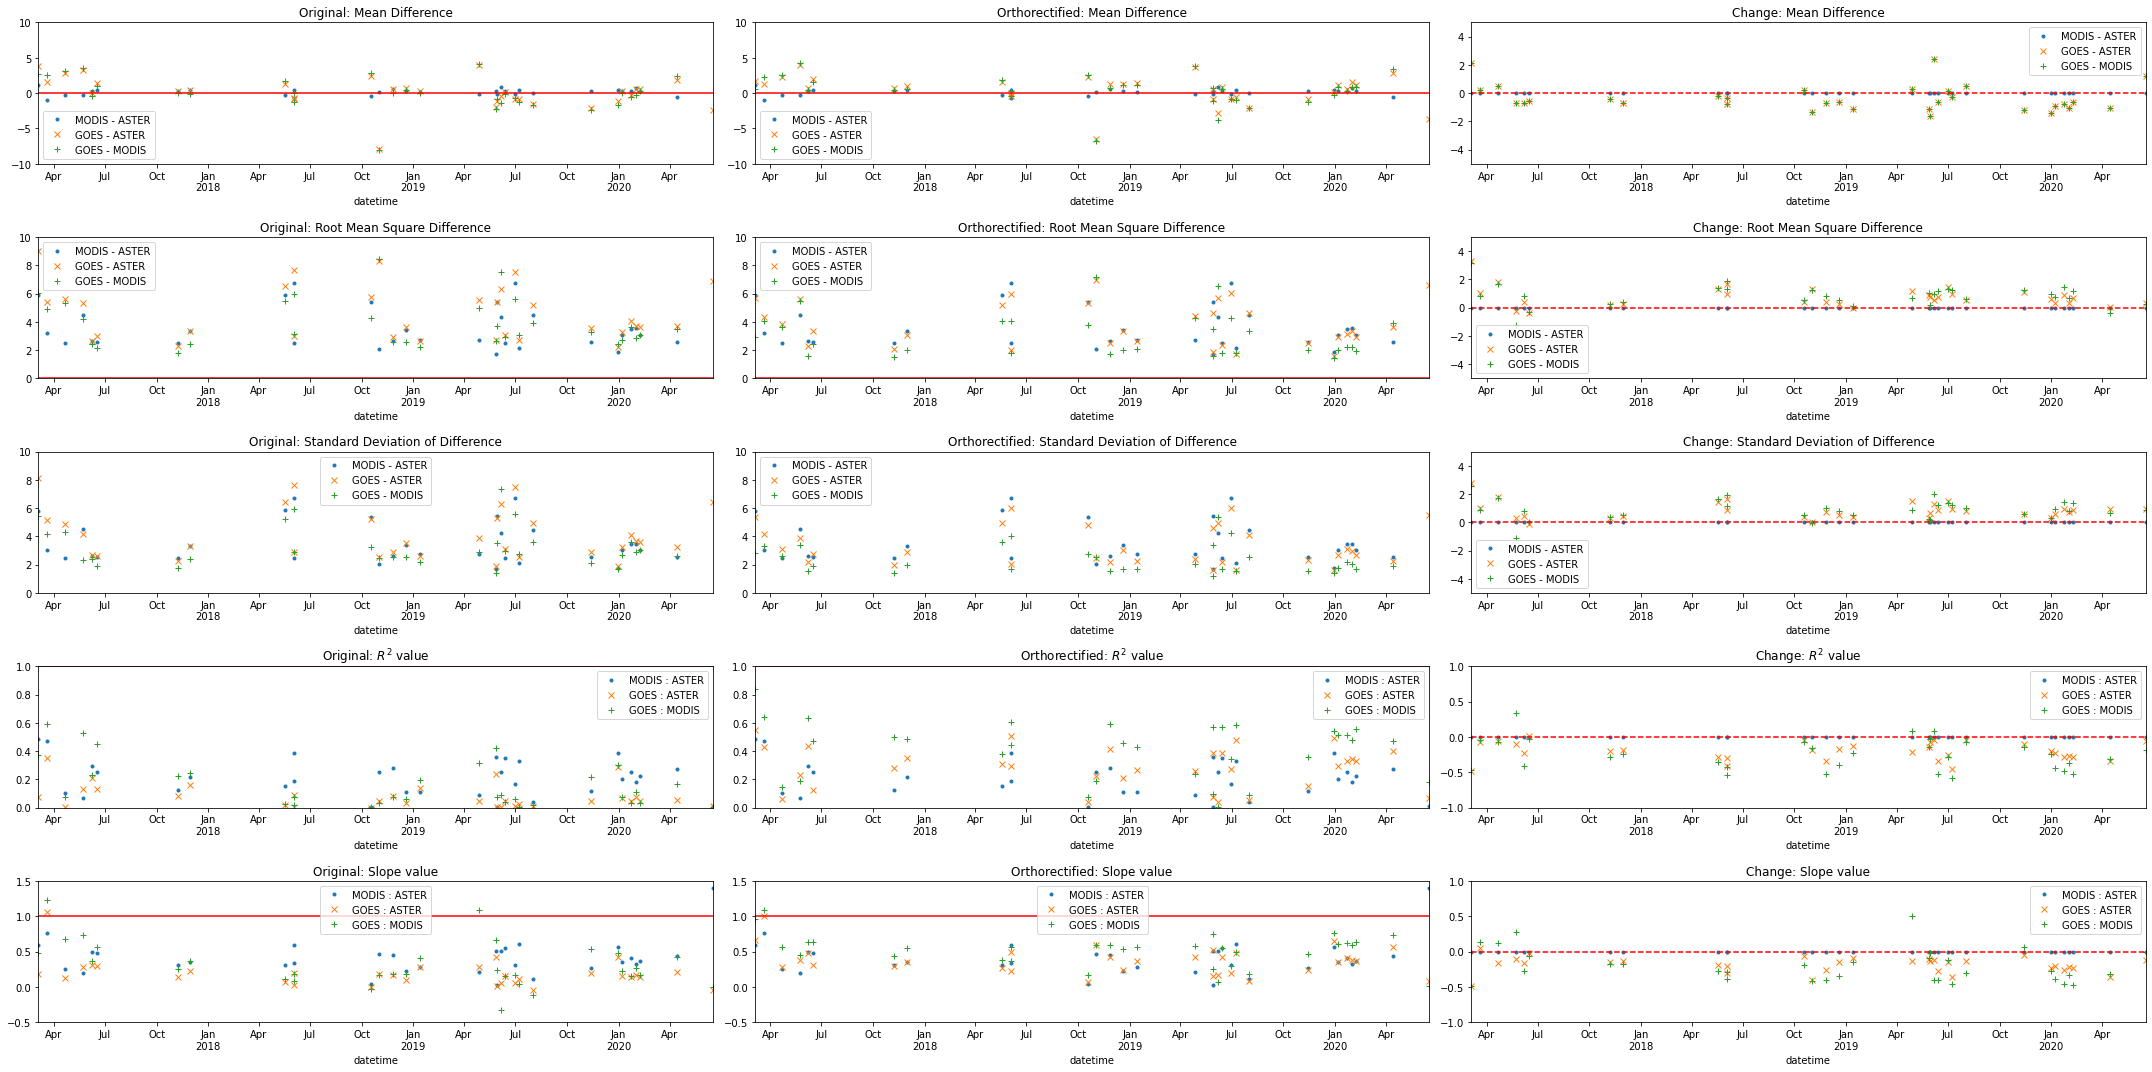

In [7]:
fig, axes = plt.subplots(5,3,figsize=(30,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='.', ax=ax[0], label='MODIS - ASTER')
df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='x', ax=ax[0], label='GOES - ASTER')
df_original_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+', ax=ax[0], label='GOES - MODIS')
ax[0].set_title('Original: Mean Difference')
ax[0].set_ylim(-10,10)
ax[0].axhline(0,c='r')

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='.',  ax=ax[3], label='MODIS - ASTER')
df_original_tb.ast_goes_rms_diff.plot(linestyle='none', marker='x', ax=ax[3],  label='GOES - ASTER')
df_original_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+', ax=ax[3],  label='GOES - MODIS')
ax[3].set_title('Original: Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='r')

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='.',  ax=ax[6], label='MODIS - ASTER')
df_original_tb.ast_goes_std_diff.plot(linestyle='none', marker='x', ax=ax[6],  label='GOES - ASTER')
df_original_tb.mod_goes_std_diff.plot(linestyle='none', marker='+', ax=ax[6],  label='GOES - MODIS')
ax[6].set_title('Original: Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='.',  ax=ax[9], label='MODIS : ASTER')
df_original_tb.ast_goes_r2_value.plot(linestyle='none', marker='x', ax=ax[9],  label='GOES : ASTER')
df_original_tb.mod_goes_r2_value.plot(linestyle='none', marker='+', ax=ax[9],  label='GOES : MODIS')
ax[9].set_title('Original: $R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='r')

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='.',  ax=ax[12], label='MODIS : ASTER')
df_original_tb.ast_goes_slope.plot(linestyle='none', marker='x', ax=ax[12],  label='GOES : ASTER')
df_original_tb.mod_goes_slope.plot(linestyle='none', marker='+', ax=ax[12],  label='GOES : MODIS')
ax[12].set_title('Original: Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='r')

### Orthorectified stats

df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='.', ax=ax[1], label='MODIS - ASTER')
df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='x', ax=ax[1], label='GOES - ASTER')
df_ortho_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+', ax=ax[1], label='GOES - MODIS')
ax[1].set_title('Orthorectified: Mean Difference')
ax[1].set_ylim(-10,10)
ax[1].axhline(0,c='r')

df_ortho_tb.ast_mod_rms_diff.plot(linestyle='none', marker='.',  ax=ax[4], label='MODIS - ASTER')
df_ortho_tb.ast_goes_rms_diff.plot(linestyle='none', marker='x', ax=ax[4],  label='GOES - ASTER')
df_ortho_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+', ax=ax[4],  label='GOES - MODIS')
ax[4].set_title('Orthorectified: Root Mean Square Difference')
ax[4].set_ylim(0,10)
ax[4].axhline(0,c='r')

df_ortho_tb.ast_mod_std_diff.plot(linestyle='none', marker='.',  ax=ax[7], label='MODIS - ASTER')
df_ortho_tb.ast_goes_std_diff.plot(linestyle='none', marker='x', ax=ax[7],  label='GOES - ASTER')
df_ortho_tb.mod_goes_std_diff.plot(linestyle='none', marker='+', ax=ax[7],  label='GOES - MODIS')
ax[7].set_title('Orthorectified: Standard Deviation of Difference')
ax[7].set_ylim(0,10)

df_ortho_tb.ast_mod_r2_value.plot(linestyle='none', marker='.',  ax=ax[10], label='MODIS : ASTER')
df_ortho_tb.ast_goes_r2_value.plot(linestyle='none', marker='x', ax=ax[10],  label='GOES : ASTER')
df_ortho_tb.mod_goes_r2_value.plot(linestyle='none', marker='+', ax=ax[10],  label='GOES : MODIS')
ax[10].set_title('Orthorectified: $R^2$ value')
ax[10].set_ylim(0,1)
ax[10].axhline(1,c='r')

df_ortho_tb.ast_mod_slope.plot(linestyle='none', marker='.',  ax=ax[13], label='MODIS : ASTER')
df_ortho_tb.ast_goes_slope.plot(linestyle='none', marker='x', ax=ax[13],  label='GOES : ASTER')
df_ortho_tb.mod_goes_slope.plot(linestyle='none', marker='+', ax=ax[13],  label='GOES : MODIS')
ax[13].set_title('Orthorectified: Slope value')
ax[13].set_ylim(-0.5,1.5)
ax[13].axhline(1,c='r')


### Change (original - ortho) stats

df_change_tb.ast_mod_mean_diff.plot(linestyle='none', marker='.', ax=ax[2], label='MODIS - ASTER')
df_change_tb.ast_goes_mean_diff.plot(linestyle='none', marker='x', ax=ax[2], label='GOES - ASTER')
df_change_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+', ax=ax[2], label='GOES - MODIS')
ax[2].set_title('Change: Mean Difference')
ax[2].set_ylim(-5,5)
ax[2].axhline(0,c='r',linestyle='--')

df_change_tb.ast_mod_rms_diff.plot(linestyle='none', marker='.',  ax=ax[5], label='MODIS - ASTER')
df_change_tb.ast_goes_rms_diff.plot(linestyle='none', marker='x', ax=ax[5],  label='GOES - ASTER')
df_change_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+', ax=ax[5],  label='GOES - MODIS')
ax[5].set_title('Change: Root Mean Square Difference')
ax[5].set_ylim(-5,5)
ax[5].axhline(0,c='r',linestyle='--')

df_change_tb.ast_mod_std_diff.plot(linestyle='none', marker='.',  ax=ax[8], label='MODIS - ASTER')
df_change_tb.ast_goes_std_diff.plot(linestyle='none', marker='x', ax=ax[8],  label='GOES - ASTER')
df_change_tb.mod_goes_std_diff.plot(linestyle='none', marker='+', ax=ax[8],  label='GOES - MODIS')
ax[8].set_title('Change: Standard Deviation of Difference')
ax[8].set_ylim(-5,5)
ax[8].axhline(0,c='r',linestyle='--')

df_change_tb.ast_mod_r2_value.plot(linestyle='none', marker='.',  ax=ax[11], label='MODIS : ASTER')
df_change_tb.ast_goes_r2_value.plot(linestyle='none', marker='x', ax=ax[11],  label='GOES : ASTER')
df_change_tb.mod_goes_r2_value.plot(linestyle='none', marker='+', ax=ax[11],  label='GOES : MODIS')
ax[11].set_title('Change: $R^2$ value')
ax[11].set_ylim(-1,1)
ax[11].axhline(0,c='r',linestyle='--')

df_change_tb.ast_mod_slope.plot(linestyle='none', marker='.',  ax=ax[14], label='MODIS : ASTER')
df_change_tb.ast_goes_slope.plot(linestyle='none', marker='x', ax=ax[14],  label='GOES : ASTER')
df_change_tb.mod_goes_slope.plot(linestyle='none', marker='+', ax=ax[14],  label='GOES : MODIS')
ax[14].set_title('Change: Slope value')
ax[14].set_ylim(-1,1)
ax[14].axhline(0,c='r',linestyle='--')

for this_ax in ax:
    format_date_ax(this_ax)
    this_ax.legend(loc='best')
